4-24-19: 01-exploration.ipynb is for initial data loading, exploring, and visualization

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from pathlib import Path
import seaborn as sns
import numpy as np
import glob #good for 
import cv2

import io, time
tm = time.time()

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 68 ms


In [9]:
os.getcwd()

'/Users/geickelb1/Documents/GitHub/dl_mri_project/notebooks'

time: 2.46 ms


In [10]:
date="04242019" #defining the date for saving files later

# changing the current drive to the path specified, and assigning wd to this path. 
#os.chdir('/Users/geickelb1/Documents/GitHub/dl_mri_project') #use to change working directory


#os.chdir("..") #use to change working directory, changing it to dl_mri_project folder
wd= os.getcwd() #'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling'
# Path(wd+"/data/raw/yes") using the Path() is really useful as it allows the filepath to work on mac and windows

time: 2.26 ms


In [11]:
allyes=glob.glob("../data/raw/yes/"+'*.[pjJ][npP][gG]') #grabs all jpg and png files
allno=glob.glob("../data/raw/no/"+'*.[pjJ][npP][gG]')

time: 3.28 ms


In [6]:
allno

['../data/raw/no/30 no.jpg',
 '../data/raw/no/22 no.jpg',
 '../data/raw/no/41 no.jpg',
 '../data/raw/no/14 no.jpg',
 '../data/raw/no/no 10.jpg',
 '../data/raw/no/18 no.jpg',
 '../data/raw/no/no 9.png',
 '../data/raw/no/no 8.jpg',
 '../data/raw/no/no.jpg',
 '../data/raw/no/3 no.jpg',
 '../data/raw/no/43 no.jpg',
 '../data/raw/no/20 no.jpg',
 '../data/raw/no/32 no.jpg',
 '../data/raw/no/N15.jpg',
 '../data/raw/no/no 99.jpg',
 '../data/raw/no/no 98.jpg',
 '../data/raw/no/No11.jpg',
 '../data/raw/no/7 no.jpg',
 '../data/raw/no/12 no.jpg',
 '../data/raw/no/No13.jpg',
 '../data/raw/no/44no.jpg',
 '../data/raw/no/N16.jpg',
 '../data/raw/no/N17.jpg',
 '../data/raw/no/28 no.jpg',
 '../data/raw/no/36 no.jpg',
 '../data/raw/no/No12.jpg',
 '../data/raw/no/47 no.jpg',
 '../data/raw/no/24 no.jpg',
 '../data/raw/no/No16.jpg',
 '../data/raw/no/10 no.jpg',
 '../data/raw/no/26 no.jpg',
 '../data/raw/no/45 no.jpg',
 '../data/raw/no/no 923.jpg',
 '../data/raw/no/38 no.jpg',
 '../data/raw/no/No17.jpg',
 '.

time: 2.84 ms


# loading in a jpg image

### as array

In [16]:
import cv2
img = cv2.imread(allyes[1])
img.shape

(360, 319, 3)

time: 29.3 ms


In [17]:
img = cv2.imread(allyes[1])
pd.DataFrame(img[:20,:20,1]).describe() #first 20 x 20 voxels (or pixels?) of the mri image summarized by intensity. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,254.30000,246.800000,196.750000,118.000000,65.400000,58.050000,63.650000,60.25000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
std,1.49032,4.311551,22.847031,53.730321,73.658101,75.016823,73.946834,78.17987,76.004155,76.004155,76.004155,76.004155,76.004155,76.004155,76.004155,76.004155,76.004155,76.004155,76.004155,76.004155
min,250.00000,237.000000,183.000000,92.000000,24.000000,17.000000,26.000000,23.00000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
25%,255.00000,245.000000,185.000000,92.000000,32.000000,25.000000,30.000000,23.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
50%,255.00000,245.000000,187.000000,94.500000,32.000000,25.000000,30.000000,26.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
75%,255.00000,248.250000,194.250000,97.000000,36.000000,28.000000,33.750000,29.00000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000
max,255.00000,255.000000,255.000000,255.000000,255.000000,252.000000,251.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


time: 88.4 ms


In [18]:
(pd.DataFrame(img[:20,:20,1])/255).describe() #now data is between 0 and 1.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.997255,0.967843,0.771569,0.462745,0.256471,0.227647,0.249608,0.236275,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137
std,0.005844,0.016908,0.089596,0.210707,0.288855,0.294184,0.289988,0.306588,0.298056,0.298056,0.298056,0.298056,0.298056,0.298056,0.298056,0.298056,0.298056,0.298056,0.298056,0.298056
min,0.980392,0.929412,0.717647,0.360784,0.094118,0.066667,0.101961,0.090196,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961
25%,1.000000,0.960784,0.725490,0.360784,0.125490,0.098039,0.117647,0.090196,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882
50%,1.000000,0.960784,0.733333,0.370588,0.125490,0.098039,0.117647,0.101961,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882
75%,1.000000,0.973529,0.761765,0.380392,0.141176,0.109804,0.132353,0.113725,0.130392,0.130392,0.130392,0.130392,0.130392,0.130392,0.130392,0.130392,0.130392,0.130392,0.130392,0.130392
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.988235,0.984314,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 75.9 ms


## notes:
i believe this will need to be normalized to have mean of 0 and sd of 1. --need to check

### as picture

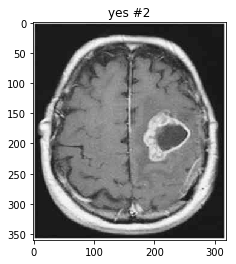

time: 198 ms


In [19]:
#https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88  helpful in this
img = cv2.imread(allyes[1])

plt.imshow(img)
plt.title('yes #2')
plt.show()

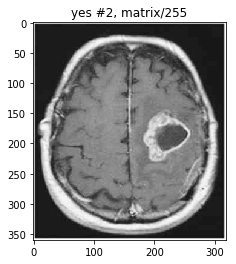

time: 125 ms


In [20]:
plt.imshow(img/255)
plt.title('yes #2, matrix/255')
plt.show()
#image looks the same

### confirming workflow works with the 2 png files

In [22]:
# #pngY=glob.glob(wd+"/data/raw/yes/"+'*.[pP][nN][gG]')
# pngN=glob.glob(wd+"/data/raw/no/"+'*.[pP][nN][gG]')

# cv2.imread(pngN[0],0)

# img = cv2.imread(pngN[0])
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #this converted it to a blueish image, i didn't like it.
# RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#this converted it to a greyscale image, seems unnecessary, cant tell difference.

# plt.imshow(img)
# plt.title('yes #1 (default grey)')
# plt.show()

# plt.imshow(RGB_im)
# plt.title('yes #1 (converted to grey)')
# plt.show()

# plt.imshow(gray)
# plt.title('yes #1 (blueish)')
# plt.show()

IndexError: list index out of range

time: 9.42 ms


### looking at first 10 yes images

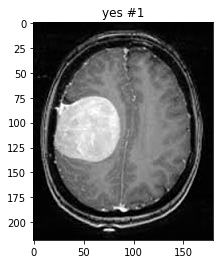

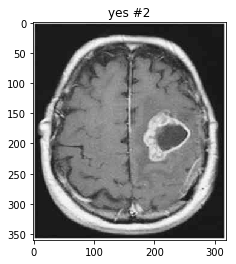

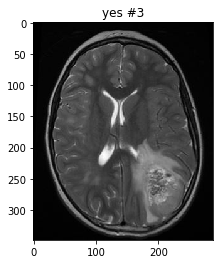

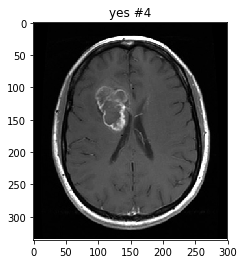

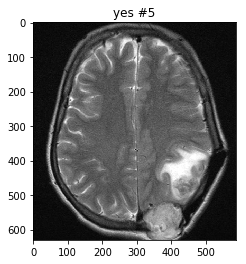

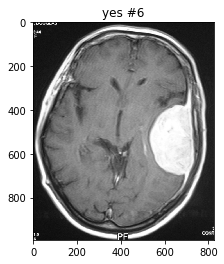

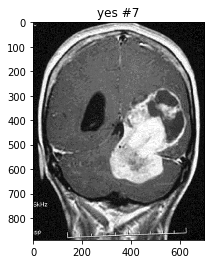

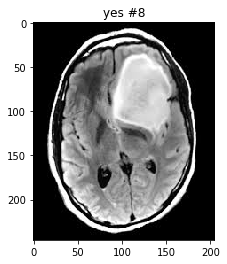

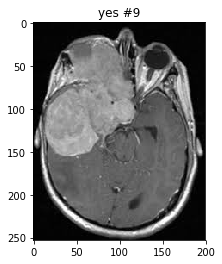

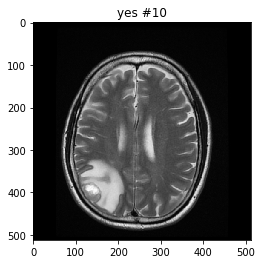

time: 1.38 s


In [23]:
for element in range(0,10):
    img = cv2.imread(allyes[element])
    #RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('yes #{}'.format(element+1))
    plt.show()

### looking at first 10 no images

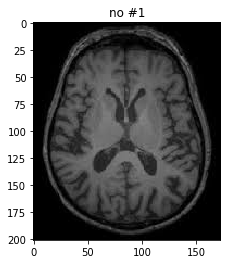

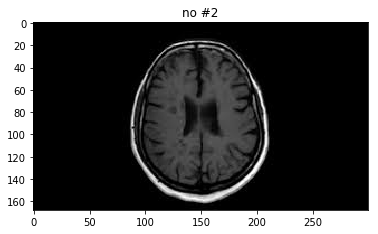

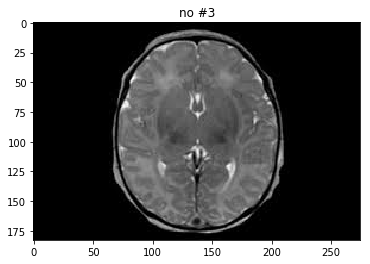

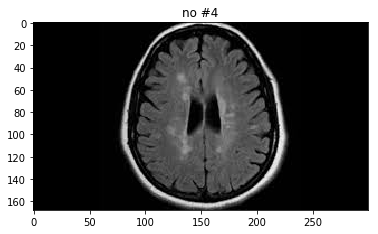

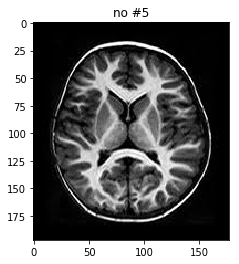

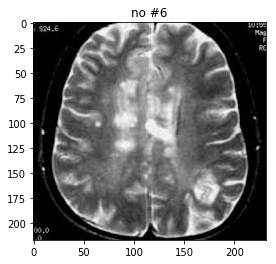

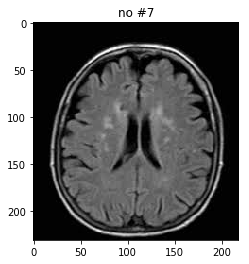

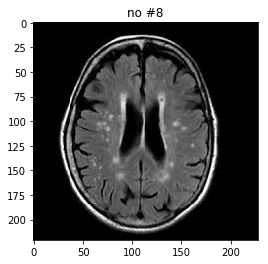

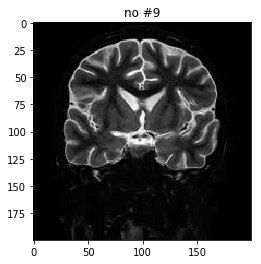

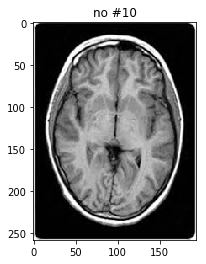

time: 1.34 s


In [24]:
#first 10 no images
for element in range(0,10):
    img = cv2.imread(allno[element])
    #RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('no #{}'.format(element+1))
    plt.show()

## notes

* the images do need some preprocessing as there is heterogenity in: 
 * color intensity/contrast
 * baseline color of grey matter
 * image size/cropping
 * maybe image scaling? 
 * depth of the MRI slice is not consistant (ie how far down the skull the image is taken- this can't be fixed by preprocessing. 

*<del> apparently there are 2 .pgn files too: no 9, and Y92
 

### exploring shape of all images
trying to find the dimensions i will need to pad to

In [25]:
dim_list=[]
for i in range(0,9):
    dim_list.append(cv2.imread(allyes[i]).shape)
dim_list


[(218, 180, 3),
 (360, 319, 3),
 (348, 287, 3),
 (336, 300, 3),
 (630, 587, 3),
 (993, 825, 3),
 (890, 700, 3),
 (246, 205, 3),
 (253, 200, 3)]

time: 48.1 ms


In [41]:
#finding max dimensions
dim_list=[]
for i in range(0,len(allyes)):
    dim_list.append(cv2.imread(allyes[i]).shape)
for i in range(0,len(allno)):
    dim_list.append(cv2.imread(allno[i]).shape)
#dim_list

time: 609 ms


In [42]:
largest_l=0
largest_w=0
i=0
i_l=0
i_w=0
for element in dim_list:
    if element[0]>largest_l:
        largest_l=element[0]
        i_l=i
    else: pass
    if element[1]>largest_w:
        largest_w=element[1]
        i_w=i
    else: pass
    i+=1
    
print(largest_l, largest_w)
print(i_l,i_w)

1427 1920
36 161
time: 13 ms


(1427, 1275, 3)


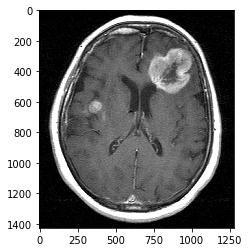

time: 268 ms


In [30]:
##largest height
print(cv2.imread(allno[36]).shape)
plt.imshow(cv2.imread(allyes[36]))
plt.show()
#allyes[36]

In [33]:
161-len(allyes)

6

time: 1.96 ms


(1080, 1920, 3)


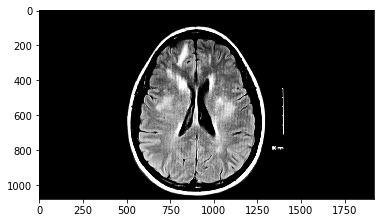

time: 298 ms


In [43]:
##largest width
print(cv2.imread(allno[161-len(allyes)]).shape)
plt.imshow(cv2.imread(allno[161-len(allyes)]))
plt.show()
#allyes[36]

findings: so i will likely need to center crop some, and pad others. 

## problem: all different image sizes. can we somehow standardize image size?

from: https://stackoverflow.com/questions/41907598/how-to-train-images-when-they-have-different-size

If, for example, your network only contains convolutional units - that is to say, does not contain fully connected layers - it can be invariant to the input image's size. Such a network could process the input images and in turn return another image ("convolutional all the way"); you would have to make sure that the output matches what you expect, since you have to determine the loss in some way, of course.

If you are using fully connected units though, you're up for trouble: Here you have a fixed number of learned weights your network has to work with, so varying inputs would require a varying number of weights - and that's not possible.

If that is your problem, here's some things you can do:

Don't care about squashing the images. 
* A network might learn to make sense of the content anyway; does scale and perspective mean anything to the content anyway?
* Center-crop the images to a specific size. If you fear you're losing data, do multiple crops and use these to augment your input data, so that the original image will be split into N different images of correct size.
* Pad the images with a solid color to a squared size, then resize.
* Do a combination of that.

In [163]:
#[y1:y2, x1:x2]
img = cv2.imread(allyes[1])
print(img.shape, img.shape[0], img.shape[1])

(img.shape[0]-500) #number of pixels need to be removed. 
(img.shape[0]/2 +250)
(img.shape[0]/2 -250)

(938, 911, 3) 938 911


219.0

time: 13.2 ms


In [171]:
#making all images 500x500 (arbitrary)
img[219:719]
#y1+h
#img[y1:y1+h, x1:x1+h].copy()

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]]], dtype=uint8)

time: 3.32 ms


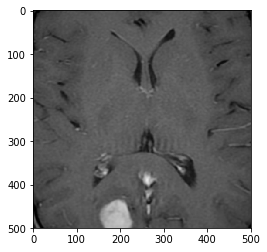

time: 189 ms


In [173]:
img = cv2.imread(allyes[1])
h=500
x1=int((img.shape[1]/2) -(h/2))
y1=int((img.shape[0]/2) -(h/2))

crop_img = img[y1:y1+h, x1:x1+h].copy() #the .copy() makes sure it doesn't change the image inline and saves it as new
plt.imshow(crop_img)
# cv2.imshow("cropped", crop_img)
# cv2.waitKey(0)

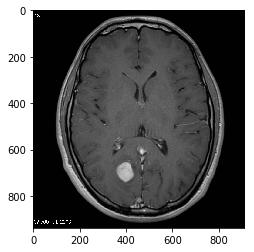

time: 184 ms


In [174]:
plt.imshow(img)

## looking at cropping for first 10 yes images

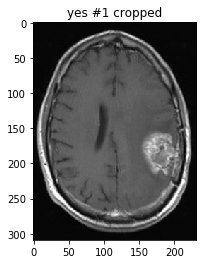

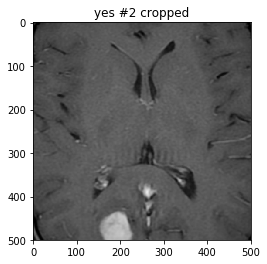

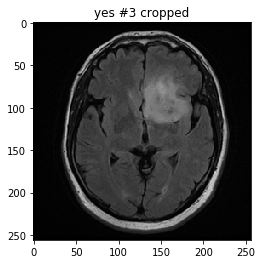

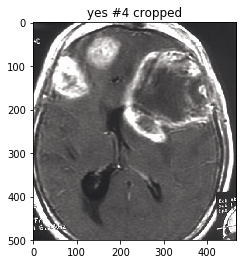

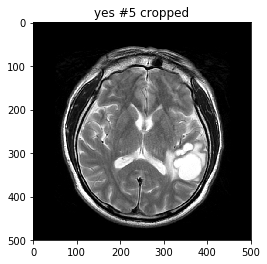

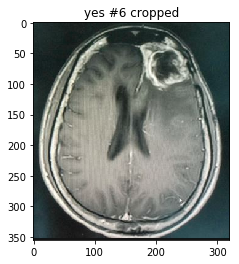

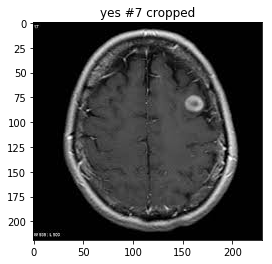

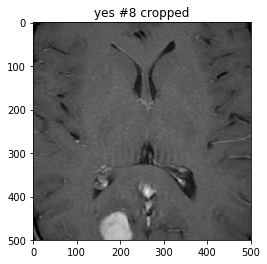

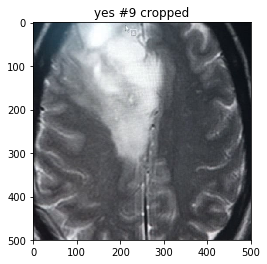

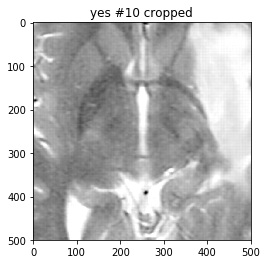

time: 1.19 s


In [176]:
for element in range(0,10):
    img = cv2.imread(allyes[element])
    h=500
    if img.shape[0]>500:
        y1=int((img.shape[0]/2) -(h/2))
        y2=y1+h
    else:
        y1=int(0)
        y2=img.shape[0]
    
    if img.shape[1]>500:
        x1=int((img.shape[1]/2) -(h/2))
        x2=x1+h
    else:
        x1=int(0)
        x2=img.shape[1]
        
    crop_img = img[y1:y2, x1:x2].copy() #the .copy() makes sure it doesn't change the image inline and saves it as new
    plt.imshow(crop_img)
    plt.title('yes #{} cropped'.format(element+1))
    plt.show()

## takeaway:
simple cropping is not going to be suitable ><

In [151]:
# dim_list=[]
# for i in range(0,9):
#     dim_list.append(cv2.imread(allyes[i]).reshape(784))
# dim_list

ValueError: cannot reshape array of size 215064 into shape (784,)

time: 9.08 ms


https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-e1d0358d9dba  - this link suggests that the 3'd dimension is the slice #, so we need to explore if there are different slices

In [79]:
test_img = cv2.imread(allyes[1])
print(test_img.shape)
#The output above suggests us that the brain was scanned in 54 slices with a resolution of 256 x 256 voxels per slice. In order to visualize each slice we need to rearrange the data.

(938, 911, 3)
time: 10.6 ms


The output above tells us that the brain was scanned in 3 slices with a resolution of 938 x 911 voxels per slice. In order to visualize each slice we need to rearrange the data.


In [29]:
test_img = cv2.imread(allyes[1])


time: 2.48 ms


In [70]:
test_RGB_im.shape

(938, 911, 3)

time: 2.73 ms


the 3d value in shape is for R/G/B pixel intensity. 

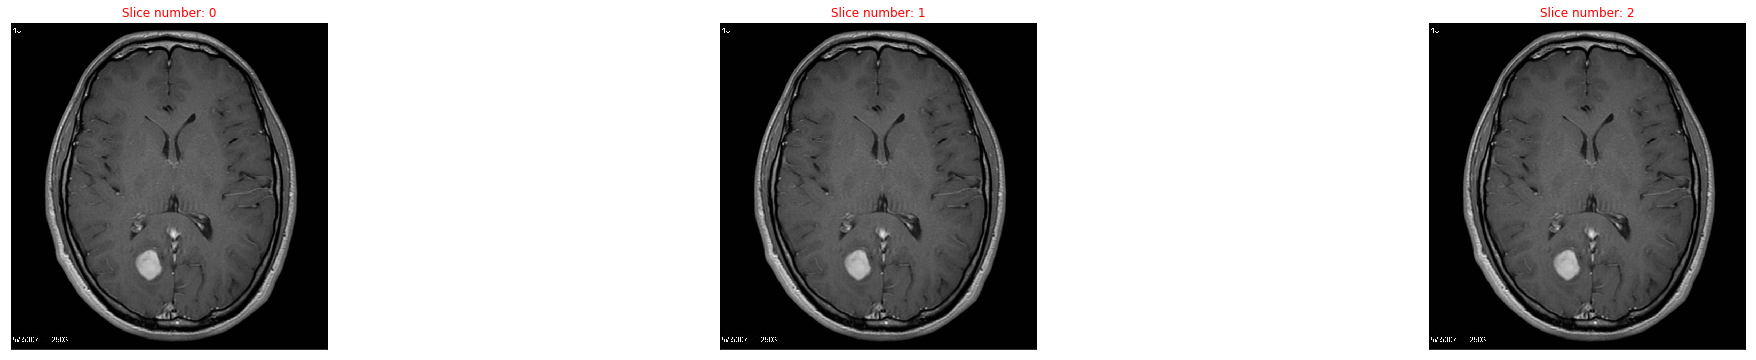

time: 460 ms


In [101]:
# fig, ax = plt.subplots(1, 3, figsize=[36, 6])

# n = 0
# slice = 0
# for i in range(0,3):
# #     test_RGB_im = cv2.cvtColor(test_img[:,:,i], cv2.COLOR_BGR2RGB)
# #     print(test_RGB_im.shape)
# #     print(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)[:,:,i].shape)
# #     ax[n].imshow(cv2.cvtColor(test_img[:,:,i], cv2.COLOR_BGR2RGB), 'gray')
# #     ax[n].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)[:,:,i], 'gray')
#     ax[n].imshow(test_img[:,:,i], 'gray')
#     ax[n].set_xticks([])
#     ax[n].set_yticks([])
#     ax[n].set_title('Slice number: {}'.format(slice), color='r')
#     n += 1
#     slice += 1

(911, 938, 3)


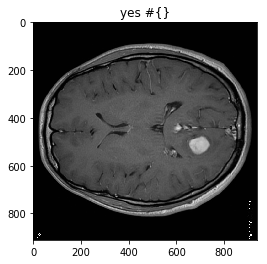

time: 254 ms


In [48]:
#rotating the image

import numpy as np
data = np.rot90(test_img.squeeze(), 1)
print(data.shape)
#(256, 256, 54)

test_RGB_im = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)

plt.imshow(test_RGB_im)
plt.title('yes #{}')
plt.show()


# todo:

going to read through https://medium.com/tensorflow/an-introduction-to-biomedical-image-analysis-with-tensorflow-and-dltk-2c25304e7c13 and see if any useful information.

# notes
* https://github.com/jcreinhold/intensity-normalization
Intensity normalization is an important pre-processing step in many image processing applications regarding MR images since MR images do not have a consistent intensity scale. this is definitely a problem we see here. 

* https://arxiv.org/abs/1812.04652: Image synthesis learns a transformation from the intensity features of an input image to yield a different tissue contrast of the output image. This process has been shown to have application in many medical image analysis tasks including imputation, registration, and segmentation. To carry out synthesis, the intensities of the input images are typically scaled--i.e., normalized--both in training to learn the transformation and in testing when applying the transformation, but it is not presently known what type of input scaling is optimal. In this paper, we consider seven different intensity normalization algorithms and three different synthesis methods to evaluate the impact of normalization. Our experiments demonstrate that intensity normalization as a preprocessing step improves the synthesis results across all investigated synthesis algorithms. Furthermore, we show evidence that suggests intensity normalization is vital for successful deep learning-based MR image synthesis.

* https://medium.com/tensorflow/an-introduction-to-biomedical-image-analysis-with-tensorflow-and-dltk-2c25304e7c13: it's possible that Due to the different nature of acquisition, some images will require special pre-processing (e.g. intensity normalization, bias-field correction, de-noising, spatial normalization/registration, etc).

try a couple of pretrained networks. the idea is that they are already trained to extract low level features of images and we can 
therefore finetune for our classification task.

examples: resnet, vgg, alexnet


also try to look at previous kaggle competitions for MRI classification.

look into u-Net (suggested by prof). it's an immage to image translation. need labeld data (need segments labeld). 

need to look at saliency map once we train an initial model.

# 5/7/19 exploring DeepDream_using_tensorflow.pdf for useful functions

In [27]:
def normalize_image(x):
    # Get the min and max values for all pixels in the input.
    x_min=x.min()
    x_max=x.max()
    
    # Normalize so all values are between 0.0 and 1.0
    x_norm=(x-x_min)/(x_max-x_min)
    return x_norm

time: 2.5 ms


In [30]:
normalize_image(test_img)

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98770492, 0.98770492, 0.98770492],
        [0.96721311, 0.96721311, 0.96721311],
        [0.9795082 , 0.9795082 , 0.9795082 ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.97540984, 0.97540984, 0.97540984],
        [0.9795082 , 0.9795082 , 0.9795082 ],
        [0.97131148, 0.97131148, 0.97131148]],

       [[1.        , 1.        , 1.        ],
        [0.99180328, 0.99180328, 0.99180328],
        [0.91393443, 0.91393443, 0.91393443],
        ...,
        [0.90983607, 0.90983607, 0.90983607],
        [0.98770492, 0.98770492, 0.98770492],
        [0.98770492, 0.98770492, 0.98770492]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.99180328, 0.99180328, 0.99180328],
        [0.91393443, 0

time: 7.94 ms


In [32]:
test_img/255

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98823529, 0.98823529, 0.98823529],
        [0.96862745, 0.96862745, 0.96862745],
        [0.98039216, 0.98039216, 0.98039216]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.97647059, 0.97647059, 0.97647059],
        [0.98039216, 0.98039216, 0.98039216],
        [0.97254902, 0.97254902, 0.97254902]],

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.91764706, 0

time: 4.46 ms


# 5/9/19 combining all yes and no into arrays

## first need to choose an image size and add/remove boarder to make all same size

### exploring shape of all images
trying to find the dimensions i will need to pad to

In [41]:
#finding max dimensions
dim_list=[]
for i in range(0,len(allyes)):
    dim_list.append(cv2.imread(allyes[i]).shape)
for i in range(0,len(allno)):
    dim_list.append(cv2.imread(allno[i]).shape)
#dim_list

time: 609 ms


In [42]:
largest_l=0
largest_w=0
i=0
i_l=0
i_w=0
for element in dim_list:
    if element[0]>largest_l:
        largest_l=element[0]
        i_l=i
    else: pass
    if element[1]>largest_w:
        largest_w=element[1]
        i_w=i
    else: pass
    i+=1
    
print(largest_l, largest_w)
print(i_l,i_w)

1427 1920
36 161
time: 13 ms


(1427, 1275, 3)


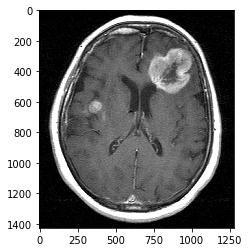

time: 268 ms


In [30]:
##largest height
print(cv2.imread(allno[36]).shape)
plt.imshow(cv2.imread(allyes[36]))
plt.show()
#allyes[36]

In [33]:
161-len(allyes)

6

time: 1.96 ms


(1080, 1920, 3)


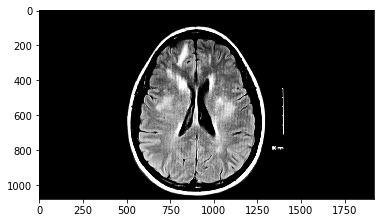

time: 298 ms


In [43]:
##largest width
print(cv2.imread(allno[161-len(allyes)]).shape)
plt.imshow(cv2.imread(allno[161-len(allyes)]))
plt.show()
#allyes[36]

findings: so i will likely need to center crop some, and pad others. 
### decision: will format to 1500x1500

In [44]:
?cv2.resize() #there's lots of parameters, may need to play around with interpolation

Docstring:
resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
.   @brief Resizes an image.
.   
.   The function resize resizes the image src down to or up to the specified size. Note that the
.   initial dst type or size are not taken into account. Instead, the size and type are derived from
.   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
.   you may call the function as follows:
.   @code
.   // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
.   resize(src, dst, dst.size(), 0, 0, interpolation);
.   @endcode
.   If you want to decimate the image by factor of 2 in each direction, you can call the function this
.   way:
.   @code
.   // specify fx and fy and let the function compute the destination image size.
.   resize(src, dst, Size(), 0.5, 0.5, interpolation);
.   @endcode
.   To shrink an image, it will generally look best with #INTER_AREA interpolation, whereas to
.   enlarge an image, it 

time: 1.64 ms


In [69]:
test_no=cv2.imread(allno[161-len(allyes)])
test_yes=cv2.imread(allyes[36])

old_size=test_no.shape[:2]
old_size
scale_ratio=1500/min(old_size)

new_size = tuple([int(x*scale_ratio) for x in old_size])
im = cv2.resize(test_no, (new_size[1], new_size[0]))


time: 46.7 ms


In [70]:
new_size

(1500, 2666)

time: 2.31 ms


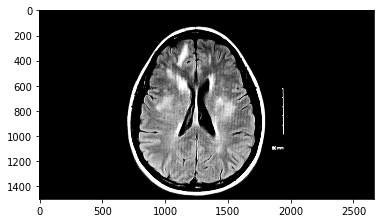

time: 375 ms


In [71]:
plt.imshow(im)
plt.show()

In [ ]:
### now need to center crop to 1500,1500

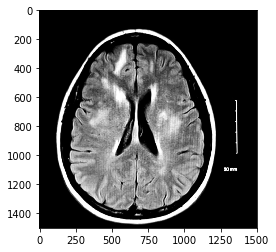

time: 305 ms


In [73]:

h=1500
x1=int((im.shape[1]/2) -(h/2))
y1=int((im.shape[0]/2) -(h/2))

crop_img = im[y1:y1+h, x1:x1+h].copy() #the .copy() makes sure it doesn't change the image inline and saves it as new
plt.imshow(crop_img)


###WORKS!
now i need to wrap it all in a fxn:

In [119]:
def img_std_size1(im):
    print("img size:", im.shape)

    h=1500 #desired size
    ##scaling a pictures smallest dimension to 1500
    old_size=im.shape[:2]
    
    scale_ratio=h/min(old_size)
    
    new_size = tuple([int(x*scale_ratio) for x in old_size])
    im = cv2.resize(im, (new_size[1], new_size[0]))
    
    #cropping the rescaled image to 1500x1500
    x1=int((im.shape[1]/2) -(h/2))
    y1=int((im.shape[0]/2) -(h/2))

    crop_img = im[y1:y1+h, x1:x1+h].copy() #the .copy() makes sure it doesn't change the image inline and saves it as new
    print('scaled and cropped:')
    plt.imshow(crop_img)
    
    #return(crop_img)
    #plt.imshow(crop_img)


time: 18.5 ms


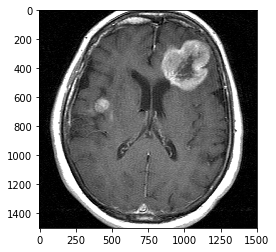

time: 321 ms


In [90]:
plt.imshow(img_std_size(test_yes))

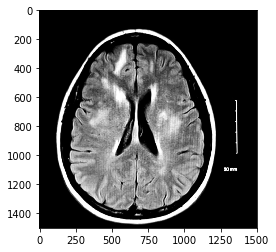

time: 312 ms


In [91]:
plt.imshow(img_std_size(test_no))

### testing alternative:scale the largest to 1500 and add black background

In [104]:
test_no.shape #height, length

(1080, 1920, 3)

time: 1.93 ms


In [118]:
def img_std_size2(img):
    #alternative, scale the largest to 1500 and add black background
    from cv2 import copyMakeBorder
    print("img size:", img.shape)
    
    #def img_std_size(im):
    im=img.copy()
    h=1500 #desired size
    ##scaling a pictures smallest dimension to 1500
    old_size=im.shape[:2]

    ##scaling image down by factor of 1500/max dimension
    scale_ratio=h/max(old_size) #scale it up or down to max=1500
    new_size = tuple([int(x*scale_ratio) for x in old_size])
    im = cv2.resize(im, (new_size[1], new_size[0]))
    plt.imshow(im)
    print("scaled, no boarder:")
    plt.show()

    # ##adding appropriate amount of boarder
    top=int((1500-im.shape[0])/2)
    bottom=int((1500-im.shape[0])/2)
    left=int((1500-im.shape[1])/2)
    right=int((1500-im.shape[1])/2)

    color = [0, 0, 0]
    border_img=copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    print("scaled, w/ 1500 boarder:")
    plt.imshow(border_img)
    plt.show()
    #return(img_std_size2)

time: 29.9 ms


### testing each img scaling against each other

img size: (1080, 1920, 3)
scaled, no boarder:


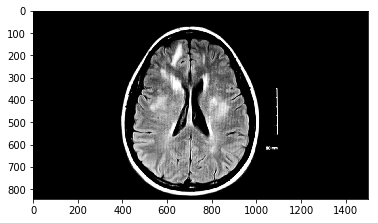

scaled, w/ 1500 boarder:


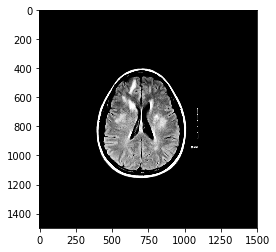

time: 473 ms


In [113]:
img_std_size2(test_no)

img size: (1080, 1920, 3)
scaled and cropped:


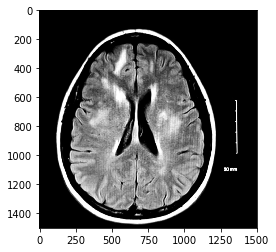

time: 310 ms


In [120]:
img_std_size1(test_no) #looks better

img size: (1427, 1275, 3)
scaled, no boarder:


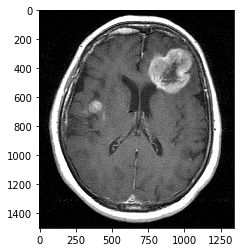

scaled, w/ 1500 boarder:


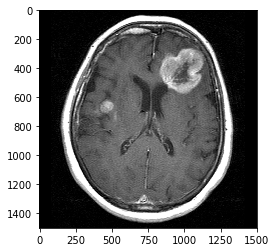

time: 494 ms


In [121]:
img_std_size2(test_yes) #looks better. 

img size: (1427, 1275, 3)
scaled and cropped:


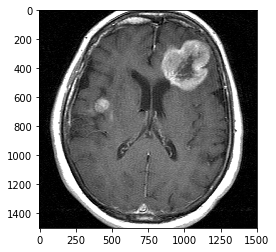

time: 330 ms


In [122]:
img_std_size1(test_yes)

findings: so if the max dimension is greater than 1500, looks like img_std_size1 is best. else if max dimension <1500, img_std_size2 is better. 

In [123]:
def master_img_scale(im):
    if max(im.shape)>1500:
        img_std_size1(im)
    else:
        img_std_size2(im)

time: 3.9 ms


img size: (1427, 1275, 3)
scaled, no boarder:


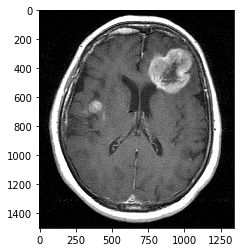

scaled, w/ 1500 boarder:


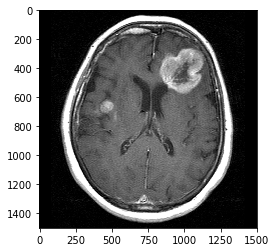

time: 531 ms


In [124]:
master_img_scale(test_yes)

img size: (1080, 1920, 3)
scaled and cropped:


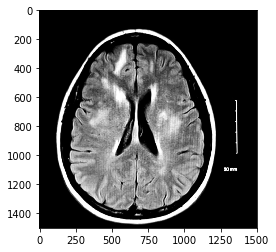

time: 270 ms


In [125]:
master_img_scale(test_no)

In [ ]:

#alternative, scale the largest to 1500 and add black background
import cv2
from cv2 import copyMakeBorder
#def img_std_size(im):
im=test_no.copy()
h=1500 #desired size
##scaling a pictures smallest dimension to 1500
old_size=im.shape[:2]

##scaling image down by factor of 1500/max dimension
scale_ratio=h/max(old_size) #scale it up or down to max=1500
new_size = tuple([int(x*scale_ratio) for x in old_size])
im = cv2.resize(im, (new_size[1], new_size[0]))
plt.imshow(im)
print("scaled, no boarder:")
plt.show()

# ##adding appropriate amount of boarder
top=int((1500-im.shape[0])/2)
bottom=int((1500-im.shape[0])/2)
left=int((1500-im.shape[1])/2)
right=int((1500-im.shape[1])/2)

color = [0, 0, 0]
border_img=copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)

print("scaled, w/ 1500 boarder:")
plt.imshow(border_img)
plt.show()

In [93]:
?cv2.copyMakeBorder #each direction specify how many pixel to extrapolate in each direction.

Docstring:
copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]]) -> dst
.   @brief Forms a border around an image.
.   
.   The function copies the source image into the middle of the destination image. The areas to the
.   left, to the right, above and below the copied source image will be filled with extrapolated
.   pixels. This is not what filtering functions based on it do (they extrapolate pixels on-fly), but
.   what other more complex functions, including your own, may do to simplify image boundary handling.
.   
.   The function supports the mode when src is already in the middle of dst . In this case, the
.   function does not copy src itself but simply constructs the border, for example:
.   
.   @code{.cpp}
.   // let border be the same in all directions
.   int border=2;
.   // constructs a larger image to fit both the image and the border
.   Mat gray_buf(rgb.rows + border*2, rgb.cols + border*2, rgb.depth());
.   // select the middle part of it w/o co

time: 2.55 ms


In [ ]:
##example code
import cv2

desired_size = 368
im_pth = "/home/jdhao/test.jpg"

im = cv2.imread(im_pth)
old_size = im.shape[:2] # old_size is in (height, width) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])

# new_size should be in (width, height) format

im = cv2.resize(im, (new_size[1], new_size[0]))

delta_w = desired_size - new_size[1]
delta_h = desired_size - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

color = [0, 0, 0]
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)

cv2.imshow("image", new_im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
X_data = []
#files = glob.glob ("C:/Users/xxx/Desktop/asdf/*.PNG")
for myFile in allyes:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)

../data/raw/yes/Y157.JPG


NameError: name 'cv2' is not defined

time: 170 ms


In [56]:
X_data

AttributeError: 'list' object has no attribute 'concat'

time: 6.93 ms


In [47]:
np.array(X_data).shape

(155,)

time: 1.49 ms


In [12]:
x=[]
y=[]
for myFile in allyes:
    image = cv2.imread (myFile)
    x.append (image)
    y.append([1., 0.])
for myFile in allno:
    image = cv2.imread (myFile) 
    x.append (image)
    y.append([0., 1.])
train = np.array(x,dtype='float32') #as mnist
train_labels = np.array(y,dtype='float64') #as mnist

ValueError: setting an array element with a sequence.

time: 820 ms


In [61]:
# Do some basic transforms of data

# We want the pixels in X to have values between 0-1. We'll need to cast to float32 to support the range 0-1.
X =x.astype('float32') / 255.0


AttributeError: 'list' object has no attribute 'astype'

time: 7.44 ms


In [ ]:

# As mentioned in lecture 3, we'll need to flatten X to input it into our basic neural network
X = X.reshape((len(X), -1)).T

# Y should be a 1-hot vector with a 1 indicating the digit class and 0 elsewhere
T = np.zeros((len(Y), 10), dtype='float32').T                   
for i in range(len(Y)): 
    T[Y[i], i] = 1

In [59]:
np.array(x)

array([array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]]], dtype=uint8),
       array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [247, 247, 247],
        [250, 250, 250]],

       [[255, 255, 2

time: 104 ms


In [37]:
img=np.array()
for element in range(0,len(allyes)):
    img.append(cv2.imread(allyes[element]))

TypeError: array() missing required argument 'object' (pos 1)

time: 7.44 ms


In [36]:
img.shape

(357, 283, 3)

time: 1.49 ms


In [1]:
allyes_img = [cv2.imread(file) for file in allyes]
allno_img = [cv2.imread(file) for file in allno]

NameError: name 'allyes' is not defined

In [147]:
np.array(allyes_img).shape

(155,)

time: 2.52 ms


In [130]:
from os.path import isfile, join
allyes_img = np.empty(len(allyes), dtype=object)
# for n in range(0, len(allyes)):
#       allyes_img[n] = cv2.imread([cv2.imread(file) for file in allyes])

TypeError: bad argument type for built-in operation

time: 405 ms
